In [46]:
import pandas as pd
from plotnine import *
import os

In [121]:
data_list = []
directory = os.path.join(os.path.dirname("./"), '')

for file in os.listdir(directory):
    if not (file.lower().endswith('.csv')):
        continue
    df = pd.read_csv(file)
    data_list.append(df)

In [122]:
all_data = pd.concat(data_list)

In [123]:
df_accs = (
    all_data[all_data.data == 'test']
    [all_data.columns[:4]]
    .dropna(subset=['label', 'data'])
    .groupby(['label', 'data'])
    .agg('mean')
    .assign(loss = lambda x: x['0'])
    .drop(columns=['fold', '0'])
    .reset_index()
)
df_accs

,label,data,loss
0,1-layer,test,13.406569
1,1-layer-0.1,test,14.229938
2,1-layer-0.2,test,11.008466
3,1-layer-0.3,test,10.405272
4,1-layer-0.4,test,14.122850
5,1-layer-0.5,test,10.396493
6,2-layer,test,17.662473
7,2-layer-0.1,test,10.618971
8,2-layer-0.2,test,7.804256
9,2-layer-0.3,test,10.037320


In [124]:
df_filt = (
    all_data.dropna()
    .drop(columns=['fold'])
    .melt(id_vars=['label', 'data'], var_name='epoch')
    .assign(epoch = lambda x: x.epoch.astype(int))
    .assign(value = lambda x: x.value.astype(float))
    .groupby(['label', 'data', 'epoch'])
    .agg('mean')
    .reset_index()
)
df_filt

,label,data,epoch,value
0,1-layer,train,0,19.339145
1,1-layer,train,1,16.240756
2,1-layer,train,2,13.469281
3,1-layer,train,3,11.421152
4,1-layer,train,4,10.429271
...,...,...,...,...
1795,3-layer-0.5,validation,45,8.614129
1796,3-layer-0.5,validation,46,8.892484
1797,3-layer-0.5,validation,47,8.940650
1798,3-layer-0.5,validation,48,9.136858


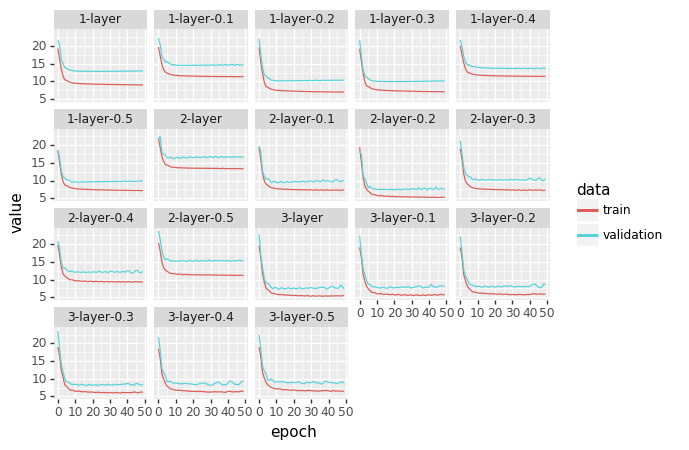

<ggplot: (8779042840645)>

In [125]:
(ggplot(df_filt)
 + aes(x='epoch', y='value', color='data')
 + geom_line()
 + facet_wrap(['label'])
)

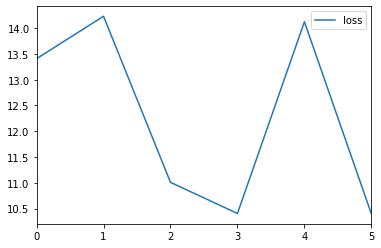

In [126]:
df_accs[df_accs.label.str.contains('1-layer')].drop(columns='data').plot()

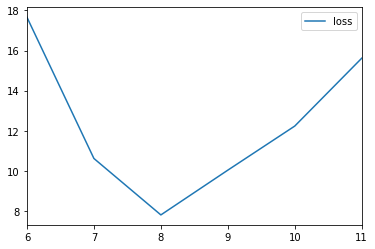

In [127]:
df_accs[df_accs.label.str.contains('2-layer')].drop(columns='data').plot()

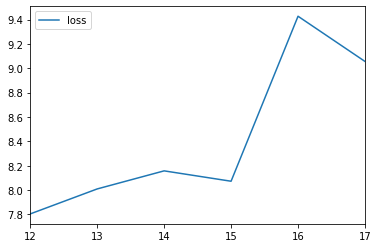

In [128]:
df_accs[df_accs.label.str.contains('3-layer')].drop(columns='data').plot()